In [47]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [48]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from datetime import datetime

In [50]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [51]:
%matplotlib inline

In [52]:
# assert np.any([[6,2]])

In [53]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [54]:
# Factors
# Value factor
filenamePE='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM)

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度

filenameABNORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'# 偏度
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      #  日均成交量
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子
filenameVOLUME = 'LZ_GPA_QUOTE_TVOLUME.csv'               # 成交量

filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv'            # 非流动性因子（自算）
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' #市值调整换手率
filenameDDA = 'Own_Factor_DDA-1d.csv' # 股票每日成交额(前复权)
# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均

In [241]:
#
filenameAroon = 'Aroon_Allstocks.csv' 
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异常波动率
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [170]:
filenameOwnSkewness = 'Own_Factor_Skewness_120d.csv'  # 250日偏度

In [171]:
# Constants
# some useful parameters
startTime =  datetime.strptime('20110101', '%Y%m%d')
endTime = datetime.strptime('20170228', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [172]:
# Several dictionaries for different sorts of factors 
filenameDictValue = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF,'ADJPB':filenameADJPB}
filenameDictGrowth = {'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT,'YOYOCF':filenameYOYOCF, 'YOYROE':filenameYOYROE, 'YOYBPS':filenameYOYBPS}
filenameDicFinance = {'CAPITALIZEDTODA':filenameCAPITALIZEDTODA, 'CASHRATIO':filenameCASHRATIO, 'CASHTOLIQDEBT':filenameCASHTOLIQDEBT,\
                     'OCFTODEBT':filenameOCFTODEBT,'PROFITTOOPTTM':filenamePROFITTOOPTTM}
filenameDictMomentum = {'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M,'PVO':filenamePVO, 'RV1Y':filenameRV1Y,\
                       'ABORMALVOLUME':filenameABNORMALVOLUME,'SKEW':filenameSKEW,'MACD':filenameMACD}
filenameDictLiq = {'TURNOVER_1M':filenameTURNOVER1M, 'AMOUNTAVG1M':filenameAMOUNTAVG1M, 'ILLIQ':filenameILLIQ,'VOLUME':filenameVOLUME,\
                  'OWNILLIQ':filenameOWNILLIQ,'ADJTURNOVER':filenameADJTURNOVER,'DDA':filenameDDA}
filenameVolatility = {'VOLATILITY':filenameOwnVol}

In [173]:
filenameTest = {'PB':filenamePB, 'YOYGR':filenameYOYGR,'ILLIQ':filenameILLIQ,'TURNOVER_1M':filenameTURNOVER1M,\
                'OWNILLIQ':filenameOWNILLIQ,'MOM_1M':filenameMOM1M,'CASHRATIO':filenameCASHRATIO,'ABOVE20MA':filenameAbove20,\
               'OWNVOL':filenameOwnVol}

In [243]:
filename7factor = {'PB':filenamePB,'YOYGR':filenameYOYGR,'OCFTODEBT':filenameOCFTODEBT,'MOM_1M':filenameMOM1M,
                  'VOLATILITY':filenameOwnVol,'DDA20':filenameDDA20,'OWNILLIQ':filenameOWNILLIQ,'SKEW':filenameSKEW,
                  'IDIVOL':filenameIDIVOL,'PS':filenamePS,'PPO':filenamePPO}

In [244]:
filenameDict = filename7factor

In [245]:
# total filename dictionary
#filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
#                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'MOM3M':filenameMOM3M, 'TURNOVER_1M':filenameTURNOVER1M }

In [246]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

In [247]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [248]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime , endTime))

In [249]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [250]:
map(lambda x: x.date().strftime("%Y%m%d"), endOfMonthList)

['20110131',
 '20110228',
 '20110331',
 '20110429',
 '20110531',
 '20110630',
 '20110729',
 '20110831',
 '20110930',
 '20111031',
 '20111130',
 '20111230',
 '20120131',
 '20120229',
 '20120330',
 '20120427',
 '20120531',
 '20120629',
 '20120731',
 '20120831',
 '20120928',
 '20121031',
 '20121130',
 '20121231',
 '20130131',
 '20130228',
 '20130329',
 '20130426',
 '20130531',
 '20130628',
 '20130731',
 '20130830',
 '20130930',
 '20131031',
 '20131129',
 '20131231',
 '20140130',
 '20140228',
 '20140331',
 '20140430',
 '20140530',
 '20140630',
 '20140731',
 '20140829',
 '20140930',
 '20141031',
 '20141128',
 '20141231',
 '20150130',
 '20150227',
 '20150331',
 '20150430',
 '20150529',
 '20150630',
 '20150731',
 '20150831',
 '20150930',
 '20151030',
 '20151130',
 '20151231',
 '20160129',
 '20160229',
 '20160331',
 '20160429',
 '20160531',
 '20160630',
 '20160729',
 '20160831',
 '20160930',
 '20161031',
 '20161130',
 '20161230',
 '20170126',
 '20170228']

In [251]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = True)

In [252]:
activeReturnData.tail()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300630.SZ,603178.SH,603833.SH,601228.SH,603041.SH,603303.SH,300635.SZ,300636.SZ,601200.SH,603385.SH
LZ_GPA_DERI_AdjustedPriceForward_20-d,,,,,,,,,,,,,,,,,,,,,
2016-09-30,-0.015340,-0.065675,0.003070,0.003943,0.024314,-0.039764,-0.126396,NaN,0.043678,-0.068367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,-0.012341,-0.032365,-0.057274,-0.011094,-0.019034,-0.013634,-0.075723,NaN,0.035110,0.058965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,-0.043033,-0.035257,-0.037238,-0.063748,-0.038444,-0.054986,-0.054893,NaN,0.112614,-0.222112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,-0.023639,-0.011151,-0.029935,-0.097596,-0.047976,-0.066746,0.006394,NaN,-0.152855,0.012700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,-0.035865,-0.009663,-0.014336,0.048949,-0.022804,0.014344,-0.035865,NaN,-0.017492,-0.043145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
IndustryDF = pd.read_csv(path+filenameIndu,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[endOfMonthList]

In [254]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2011-01-31 00:00:00 348
2011-02-28 00:00:00 374
2011-03-31 00:00:00 372
2011-04-29 00:00:00 375
2011-05-31 00:00:00 336
2011-06-30 00:00:00 360
2011-07-29 00:00:00 328
2011-08-31 00:00:00 321
2011-09-30 00:00:00 318
2011-10-31 00:00:00 298
2011-11-30 00:00:00 307
2011-12-30 00:00:00 310
2012-01-31 00:00:00 291
2012-02-29 00:00:00 287
2012-03-30 00:00:00 327
2012-04-27 00:00:00 375
2012-05-31 00:00:00 315
2012-06-29 00:00:00 321
2012-07-31 00:00:00 261
2012-08-31 00:00:00 243
2012-09-28 00:00:00 228
2012-10-31 00:00:00 207
2012-11-30 00:00:00 201
2012-12-31 00:00:00 191
2013-01-31 00:00:00 185
2013-02-28 00:00:00 185
2013-03-29 00:00:00 193
2013-04-26 00:00:00 187
2013-05-31 00:00:00 181
2013-06-28 00:00:00 189
2013-07-31 00:00:00 198
2013-08-30 00:00:00 195
2013-09-30 00:00:00 197
2013-10-31 00:00:00 204
2013-11-29 00:00:00 219
2013-12-31 00:00:00 206
2014-01-30 00:00:00 243
2014-02-28 00:00:00 266
2014-03-31 00:00:00 302
2014-04-30 00:00:00 283
2014-05-30 00:00:00 286
2014-06-30 00:00

In [255]:
normalizedLFCAP = ff.winsorAndnorm(LFCAPDF, filterdict, endOfMonthList)

In [256]:
# Creat new dataframe to save the outcome
global returnofFactor
global tValueofFactor
global pValueofFactor
global ICFactor
returnofFactor = pd.DataFrame(index=endOfMonthList[:-1],columns=[filenameDict.keys()],data=None) 
tValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
pValueofFactor = pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)
ICFactor =  pd.DataFrame(index= endOfMonthList[:-1],columns= [filenameDict.keys()],data=None)

In [257]:
pValueofFactor.tail()

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
#  ---------All above are global variables --------

In [259]:
for i,j in filenameDict.iteritems():
    print i
    factorData = ff.getData(j, thresholdNum,startTime,endTime)
    normalizedData = ff.winsorAndnorm(factorData, filterdict, endOfMonthList)
    neutralizedData = ff.neutralizeFactor(normalizedData, normalizedLFCAP,IndustryDF,endOfMonthList)
    ff.calReturnAndIC(returnofFactor,tValueofFactor,pValueofFactor,ICFactor,neutralizedData,activeReturnData,i)

OWNILLIQ
MOM_1M
IDIVOL
DDA20
VOLATILITY
PS
OCFTODEBT
SKEW
PPO
PB
YOYGR


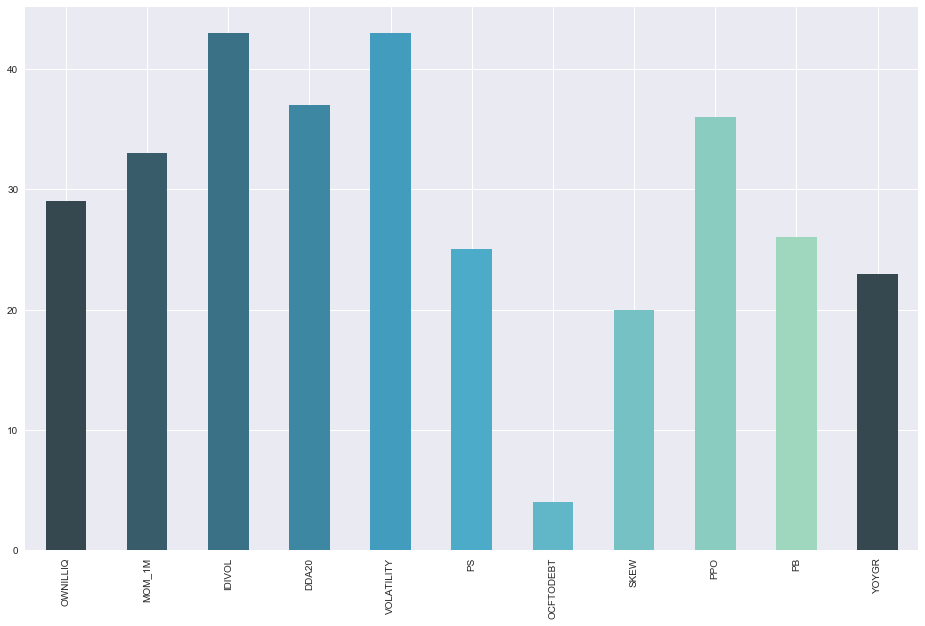

In [260]:
ICFactor[np.abs(ICFactor)>np.abs(ICFactor).mean().mean()].count().plot(figsize=(16,10),kind='bar',color=sns.color_palette("GnBu_d",10))

In [261]:
ICFactor.astype(float).describe()

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.037597,-0.074245,-0.104659,-0.047176,-0.063991,-0.044846,0.010588,-0.045774,-0.080922,-0.042983,-0.001238
std,0.096147,0.094533,0.089171,0.098121,0.128762,0.079201,0.062463,0.061611,0.099340,0.083747,0.093990
min,-0.202500,-0.318880,-0.319939,-0.268534,-0.298300,-0.239060,-0.378397,-0.218943,-0.333851,-0.216614,-0.253379
25%,-0.019538,-0.123373,-0.145941,-0.115694,-0.168747,-0.096406,-0.011674,-0.083989,-0.131480,-0.115947,-0.065275
50%,0.036989,-0.066229,-0.099518,-0.057175,-0.073353,-0.037789,0.010595,-0.042655,-0.077695,-0.031490,0.000289
75%,0.092906,-0.014102,-0.058255,0.027109,0.019041,0.011245,0.040528,-0.005361,-0.019827,0.018285,0.058704
max,0.258070,0.113821,0.077877,0.196354,0.199800,0.120768,0.201249,0.121006,0.190732,0.135154,0.201157


In [262]:
# Factors with positive IC
Above0df = ICFactor.astype(float)[ICFactor.astype(float)>0].describe()
Above0df

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
count,53.000000,15.000000,10.000000,25.000000,23.000000,27.000000,44.000000,16.000000,15.000000,27.000000,37.000000
mean,0.081962,0.047321,0.036352,0.061805,0.089649,0.031926,0.038718,0.031489,0.046286,0.041634,0.070451
std,0.066102,0.035107,0.023218,0.047316,0.063524,0.031814,0.038357,0.032401,0.053589,0.033496,0.057270
min,0.003007,0.000773,0.000789,0.001508,0.003119,0.000199,0.000461,0.000960,0.001817,0.001965,0.000289
25%,0.027302,0.017641,0.022675,0.027109,0.040615,0.008105,0.016345,0.009127,0.012398,0.016692,0.029142
50%,0.066514,0.042635,0.032386,0.048346,0.078172,0.027353,0.035886,0.018808,0.030625,0.030328,0.058704
75%,0.123493,0.072366,0.047072,0.087851,0.149148,0.039193,0.041836,0.044542,0.047466,0.070758,0.086791
max,0.258070,0.113821,0.077877,0.196354,0.199800,0.120768,0.201249,0.121006,0.190732,0.135154,0.201157


In [263]:
# Factors with negative IC
Below0df = ICFactor.astype(float)[ICFactor.astype(float)<0].describe()
Below0df

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
count,20.000000,58.000000,63.000000,48.000000,50.000000,46.000000,29.000000,57.000000,58.000000,46.000000,36.000000
mean,-0.079971,-0.105684,-0.127042,-0.103937,-0.134665,-0.089908,-0.032092,-0.067462,-0.113820,-0.092649,-0.074918
std,0.055068,0.078042,0.073753,0.063229,0.079835,0.061965,0.068142,0.049141,0.080002,0.061285,0.061502
min,-0.202500,-0.318880,-0.319939,-0.268534,-0.298300,-0.239060,-0.378397,-0.218943,-0.333851,-0.216614,-0.253379
25%,-0.115516,-0.132494,-0.159807,-0.134838,-0.193781,-0.127668,-0.030305,-0.092674,-0.150204,-0.126404,-0.104708
50%,-0.061535,-0.084099,-0.117817,-0.097111,-0.133770,-0.081843,-0.016217,-0.056221,-0.096072,-0.103246,-0.066099
75%,-0.038640,-0.054631,-0.074390,-0.062744,-0.069473,-0.042711,-0.008572,-0.037627,-0.051311,-0.039642,-0.023243
max,-0.005295,-0.000988,-0.012763,-0.000630,-0.011248,-0.001099,-0.000424,-0.000327,-0.002713,-0.000175,-0.005522


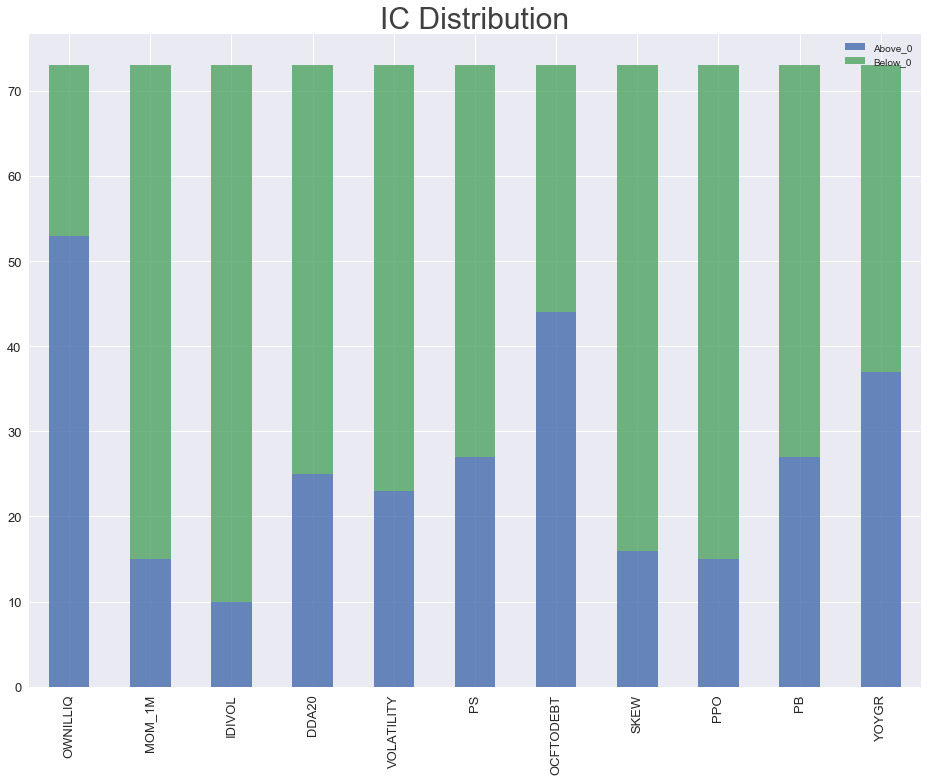

In [264]:
# show the amount of Negative IC and Positive IC in same figure
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
totaldf = pd.DataFrame({ 'Above_0':Above0df.loc['count'].values, 'Below_0':Below0df.loc['count'].values},index = Above0df.columns)
totaldf.plot(kind='bar',ax=ax, stacked =True,alpha=0.84,title ='IC Distribution',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.88, fontsize=30)

In [265]:
ICFactor.iloc[-1] > ICFactor.mean()

OWNILLIQ      False
MOM_1M         True
IDIVOL         True
DDA20          True
VOLATILITY    False
PS            False
OCFTODEBT      True
SKEW           True
PPO            True
PB            False
YOYGR         False
dtype: bool

In [266]:
ICFactorTosave = ICFactor.apply(lambda x : x/np.abs(x).sum(),axis=1).shift(1)
#ICFactorTosave.to_csv((path+'ICfactorWeight8factorsPB.csv'))

In [277]:
# calculate correlation between two factors
turnOver = pd.read_csv(path+filenameMOM1M,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
illq = pd.read_csv(path+filenamePPO,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
correlationDF = ff.showCorrelation(turnOver,illq, endOfMonthList, filterdic = None).astype(float)
correlationDF.describe()

,Pearson,Spearman
count,74.000000,74.000000
mean,0.612542,0.556747
std,0.117085,0.138555
min,0.256633,0.136954
25%,0.555925,0.481219
50%,0.625172,0.565199
75%,0.698498,0.651413
max,0.824555,0.826032


In [268]:
returnofFactor.cumsum().tail()

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
2016-09-30,0.228901,-0.51348,-0.64575,-0.434396,-0.332475,-0.0797878,-0.0114519,-0.27132,-0.56809,-0.0788311,0.0228936
2016-10-31,0.23264,-0.517854,-0.656252,-0.442266,-0.346518,-0.0790673,-0.0096431,-0.277882,-0.573395,-0.0781673,0.0215793
2016-11-30,0.235668,-0.511986,-0.65263,-0.452216,-0.353359,-0.0806052,-0.00818604,-0.281349,-0.560872,-0.0762543,0.0200339
2016-12-30,0.235102,-0.521899,-0.664578,-0.462443,-0.366428,-0.0841207,-0.00679005,-0.281288,-0.568159,-0.0792808,0.0221755
2017-01-26,0.226653,-0.527291,-0.669889,-0.464726,-0.369921,-0.0861169,-0.00486377,-0.282832,-0.571992,-0.0803098,0.023836


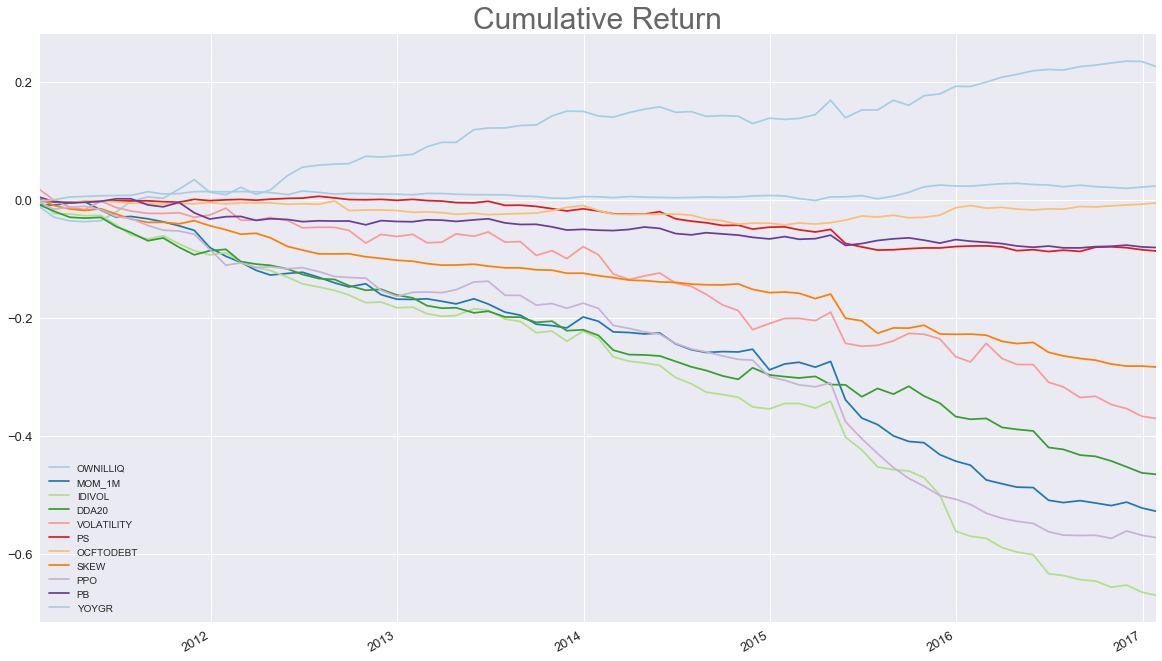

In [269]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
returnofFactor.cumsum().plot(figsize=(20,12),ax=ax,color=sns.color_palette("Paired",10),title ='Cumulative Return',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

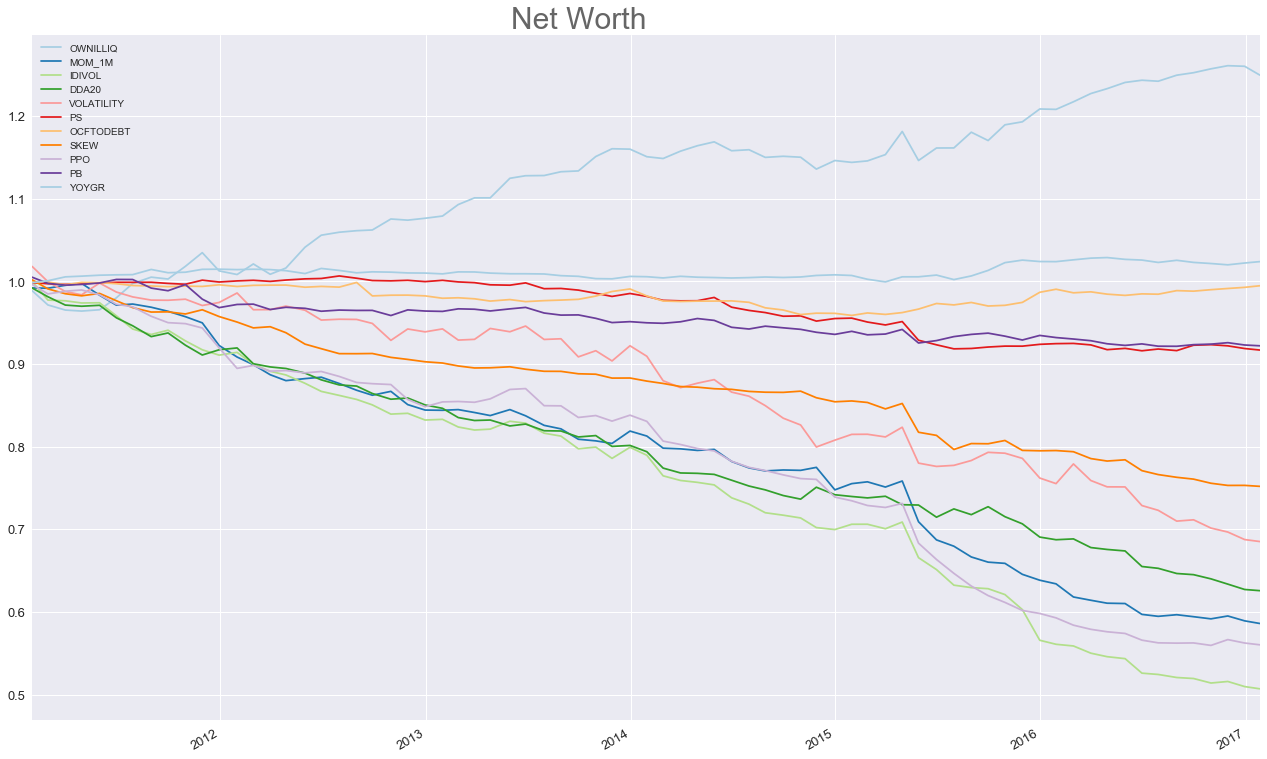

In [270]:
# Net worth plot for each factor
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(returnofFactor+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [271]:
returnofFactor.astype(float).describe()

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.003105,-0.007223,-0.009177,-0.006366,-0.005067,-0.001180,-0.000067,-0.003874,-0.007836,-0.001100,0.000327
std,0.009922,0.011757,0.012916,0.008403,0.014046,0.004119,0.003756,0.006752,0.011709,0.004788,0.002665
min,-0.029742,-0.064967,-0.061560,-0.027948,-0.052713,-0.023743,-0.016298,-0.040859,-0.065692,-0.017717,-0.005415
25%,-0.000982,-0.011014,-0.013732,-0.010259,-0.013263,-0.002741,-0.001810,-0.006005,-0.011634,-0.003027,-0.001302
50%,0.002475,-0.005773,-0.007065,-0.007589,-0.004215,-0.000625,0.000074,-0.002867,-0.005923,-0.000622,-0.000115
75%,0.008194,-0.000320,-0.002753,-0.001556,0.003788,0.000920,0.001809,-0.000103,-0.001191,0.001913,0.001840
max,0.024749,0.018601,0.017032,0.019597,0.031510,0.007125,0.012544,0.009012,0.013231,0.007558,0.009281


In [272]:
pValueofFactor.astype(float).describe()

,OWNILLIQ,MOM_1M,IDIVOL,DDA20,VOLATILITY,PS,OCFTODEBT,SKEW,PPO,PB,YOYGR
count,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,7.300000e+01,73.000000,7.300000e+01,7.300000e+01,7.300000e+01,73.000000
mean,2.052585e-01,1.206680e-01,9.832294e-02,1.462748e-01,1.347022e-01,3.928260e-01,0.475836,2.903620e-01,1.662533e-01,2.943808e-01,0.483831
std,3.009850e-01,2.336416e-01,2.263479e-01,2.468769e-01,2.822228e-01,3.119345e-01,0.302903,3.356626e-01,2.718517e-01,2.878987e-01,0.313008
min,2.495654e-22,3.174060e-48,5.789542e-52,8.998859e-34,2.912068e-41,1.205900e-08,0.001944,1.927393e-17,2.838440e-37,6.343934e-13,0.000264
25%,5.207061e-07,3.256168e-08,4.216998e-10,3.593355e-05,3.893149e-11,1.111391e-01,0.192928,7.387809e-03,3.485233e-05,4.576865e-02,0.200069
50%,7.205404e-03,2.792769e-03,1.046003e-04,2.784100e-03,4.082863e-04,3.487384e-01,0.481031,1.475500e-01,1.356153e-02,2.390284e-01,0.492165
75%,3.452031e-01,5.639468e-02,6.295809e-02,1.966002e-01,6.458924e-02,6.704954e-01,0.718815,5.003814e-01,1.811113e-01,4.350747e-01,0.762069
max,9.947864e-01,9.154508e-01,9.847574e-01,9.288397e-01,9.666086e-01,9.999372e-01,0.981691,9.768241e-01,9.407142e-01,9.685134e-01,0.994080


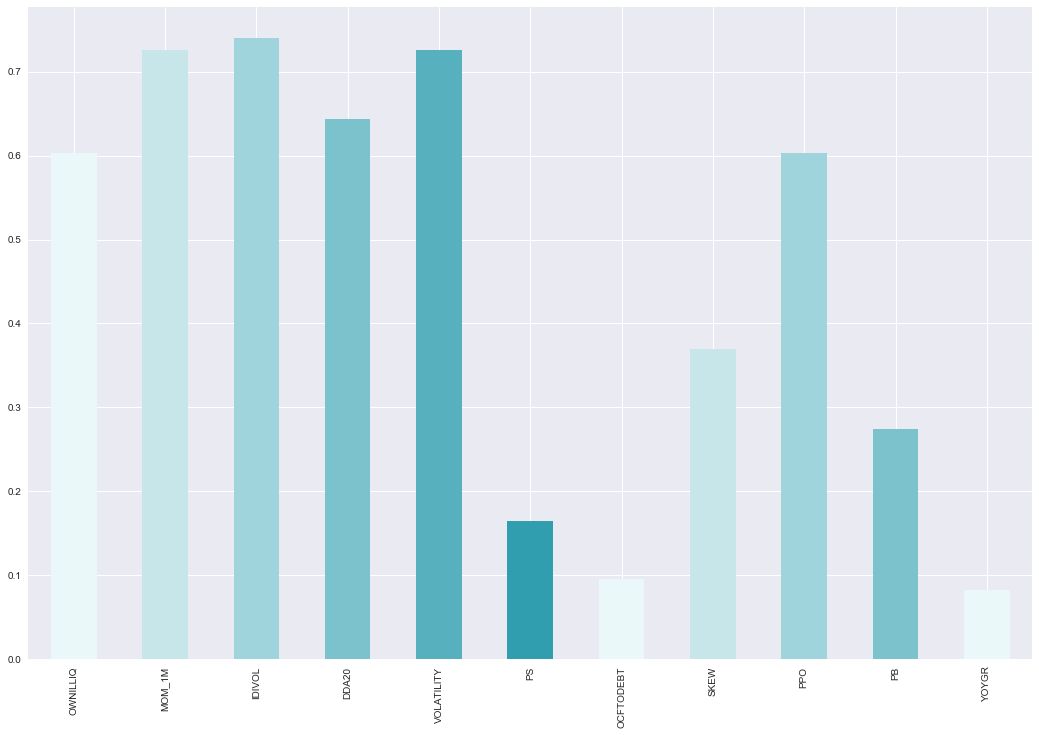

In [273]:
color_set=sns.light_palette((210, 90, 60), input="husl")
(pValueofFactor[pValueofFactor<0.05].count()/len(pValueofFactor)).plot(figsize=(18,12),kind='bar',color=sns.color_palette(color_set,10))

In [274]:
ReturnForPlot = returnofFactor.copy()
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month<12 else\
                                             100*(x.year+1)+1)

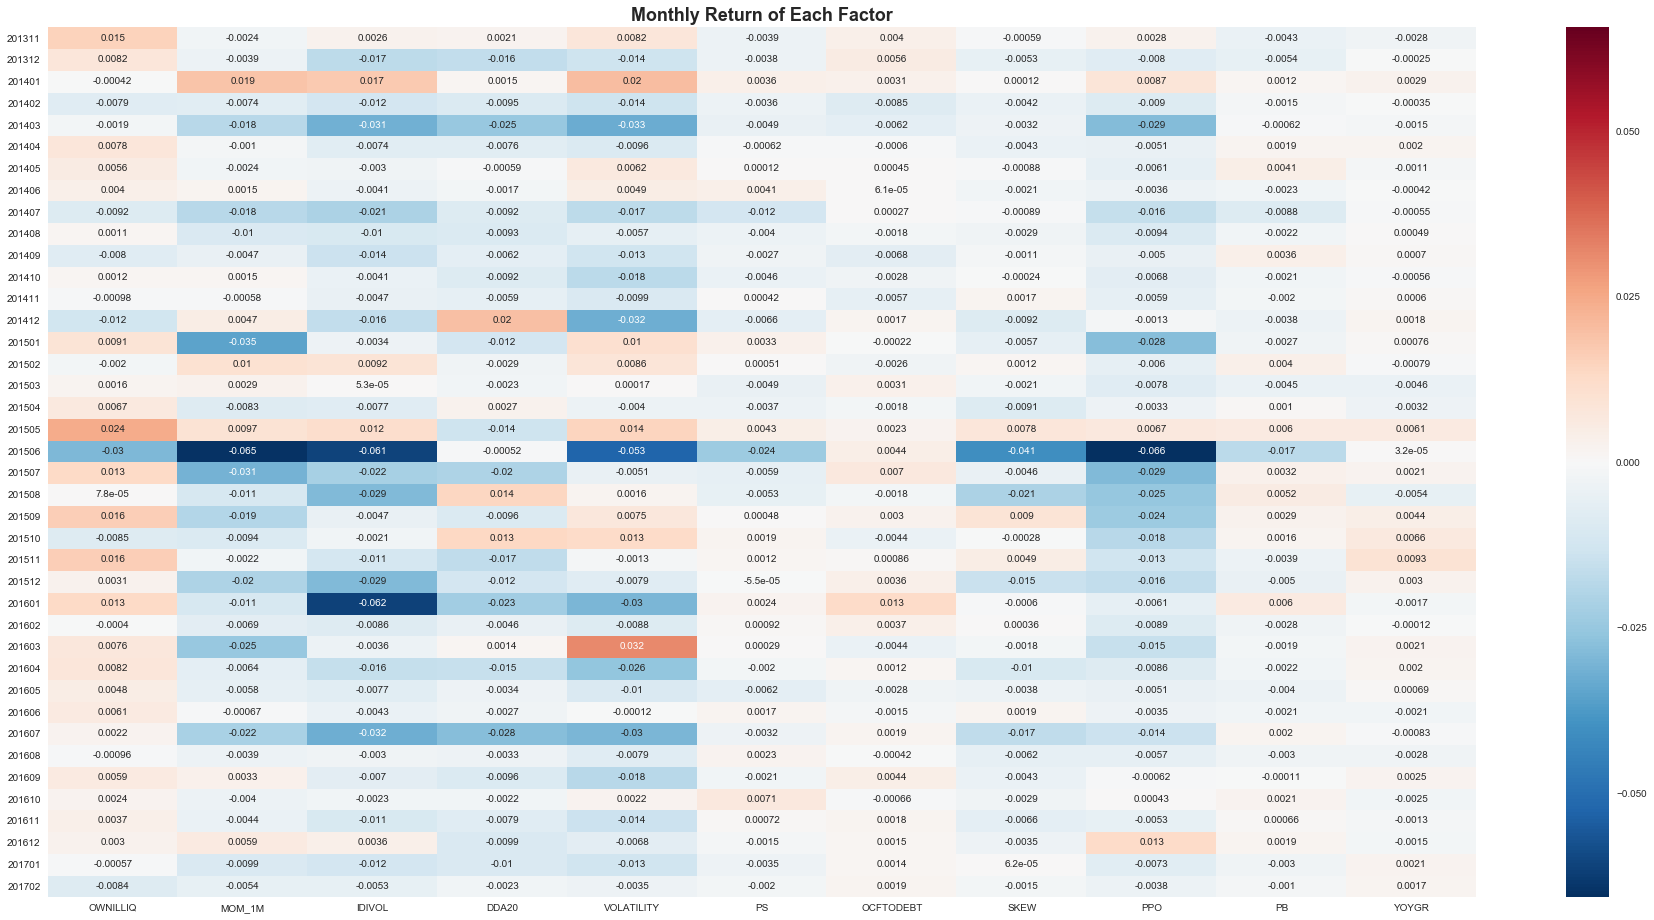

In [275]:
ReturnForPlot = ReturnForPlot.astype(float)

plt.figure(figsize=(32,16))
ax = plt.axes()
sns.heatmap(ReturnForPlot[-40:],ax=ax, annot=True)
ax.set_title('Monthly Return of Each Factor',fontsize=18, fontweight='bold')
plt.show()